# Exercise with Natural Language Processing

For todays exersice we will be doing two things.  The first is to build the same model with the same data that we did in the lecture, the second will be to build a new model with new data. 

## PART 1: 
- 20 Newsgroups Corpus


## PART 2:
- Republican vs Democrat Tweet Classifier

In [2]:
# Import pandas for data handling
import pandas as pd

# NLTK is our Natural-Language-Took-Kit
import nltk
from nltk.corpus import stopwords
from nltk import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

# Libraries for helping us with strings
import string
# Regular Expression Library
import re

# Import our text vectorizers
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer


# Import our classifiers
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier


# Import some ML helper function
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report


# Import our metrics to evaluate our model
from sklearn import metrics
from sklearn.metrics import classification_report


# Library for plotting
import matplotlib.pyplot as plt
import seaborn as sns

# You may need to download these from nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
stopwords = stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\goober\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\goober\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\goober\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\wordnet.zip.


## Load and display data.
1. Load the 20-newsgroups.csv data into a dataframe.
1. Print the shape
1. Inspect / remove nulls and duplicates
1. Find class balances, print out how many of each topic_category there are.

In [5]:
# 1. Load the 20-newsgroups.csv data into a dataframe.
# 2. Print the shape
df = pd.read_csv("data/20-newsgroups.csv")
df.shape[0]

11314

In [6]:
# 3. Inspect / remove nulls and duplicates
df.isnull().sum()

id                0
message           0
topic             0
topic_category    0
dtype: int64

In [7]:
# 4. Find class balances, print out how many of each topic_category there are.
df.topic_category.value_counts()

rec.sport.hockey            600
soc.religion.christian      599
rec.motorcycles             598
rec.sport.baseball          597
sci.crypt                   595
rec.autos                   594
sci.med                     594
sci.space                   593
comp.windows.x              593
sci.electronics             591
comp.os.ms-windows.misc     591
comp.sys.ibm.pc.hardware    590
misc.forsale                585
comp.graphics               584
comp.sys.mac.hardware       578
talk.politics.mideast       564
talk.politics.guns          546
alt.atheism                 480
talk.politics.misc          465
talk.religion.misc          377
Name: topic_category, dtype: int64

# Text Pre-Processing 
(aka Feature engineering)
1. Make a function that makes all text lowercase.
    * Do a sanity check by feeding in a test sentence into the function. 
    
    
2. Make a function that removes all punctuation. 
    * Do a sanity check by feeding in a test sentence into the function. 
    
    
3. Make a function that removes all stopwords.
    * Do a sanity check by feeding in a test sentence into the function. 
    
    
4. EXTRA CREDIT (This step only): Make a function that stemms all words. 


5. Mandatory: Make a pipeline function that applys all the text processing functions you just built.
    * Do a sanity check by feeding in a test sentence into the pipeline. 
    
    
    
6. Mandatory: Use `df['message_clean'] = df[column].apply(???)` and apply the text pipeline to your text data column. 

In [8]:
# 1. Make a function that makes all text lowercase.
def lower_case(string):
    return string.lower()

test_string = 'This is A SENTENCE with LOTS OF CAPS.'
lower_case(test_string)

'this is a sentence with lots of caps.'

In [9]:
# 2. Make a function that removes all punctuation. 
def remove_punctuation(text):
    text = re.sub(r'[^\w\s]','', text)
    return text

test_string = 'This is a sentence! 50 With lots of punctuation??? & other #things.'
remove_punctuation(test_string)

'This is a sentence 50 With lots of punctuation  other things'

In [10]:
# 3. Make a function that removes all stopwords.
def remove_stopwords(text):
    words = word_tokenize(text)
    valid_words = []
    for word in words:
        if word not in stopwords:
            valid_words.append(word)
    text = " ".join(valid_words)
    return text;

test_string = 'This is a sentence! With some different stopwords i have added in here.'
remove_stopwords(test_string)


'This sentence ! With different stopwords added .'

In [11]:
# 4. EXTRA CREDIT: Make a function that stems all words. 

def stem_words(text):
    #initialize stemmer
    porter = PorterStemmer()
    #tokenize words
    words = word_tokenize(text)
    #place to append valid words
    valid_words = []
    
    for word in words:
        stem_word = porter.stem(word)
        valid_words.append(stem_word)
    text = " ".join(valid_words)
    return text
    
test_string = 'I played and started playing with players and we all love to play with plays'

stem_words(test_string)



'i play and start play with player and we all love to play with play'

In [13]:
# 5. MANDATORY: Make a pipeline function that applys all the text processing functions you just built.
def text_pipeline(input_string):
    input_string = lower_case(input_string)
    input_string = remove_punctuation(input_string)
    input_string = remove_stopwords(input_string)
    input_string = stem_words(input_string)
    return input_string

test_string = 'I played and started playing with players and we all love to play with plays'

text_pipeline(test_string)


'play start play player love play play'

In [14]:
# 6. Mandatory: Use `df[column].apply(???)` and apply the text pipeline to your text data column. 
df['message_clean'] = df['message'].apply(text_pipeline)

print("ORIGINAL TEXT\n:", df['message'][0])
print("CLEANDED TEXT\n:", df['message_clean'][0])

ORIGINAL TEXT
: From: lerxst@wam.umd.edu (where's my thing)
Subject: WHAT car is this!?
Nntp-Posting-Host: rac3.wam.umd.edu
Organization: University of Maryland, College Park
Lines: 15

 I was wondering if anyone out there could enlighten me on this car I saw
the other day. It was a 2-door sports car, looked to be from the late 60s/
early 70s. It was called a Bricklin. The doors were really small. In addition,
the front bumper was separate from the rest of the body. This is 
all I know. If anyone can tellme a model name, engine specs, years
of production, where this car is made, history, or whatever info you
have on this funky looking car, please e-mail.

Thanks,
- IL
   ---- brought to you by your neighborhood Lerxst ----





CLEANDED TEXT
: lerxstwamumdedu where thing subject car nntppostinghost rac3wamumdedu organ univers maryland colleg park line 15 wonder anyon could enlighten car saw day 2door sport car look late 60 earli 70 call bricklin door realli small addit front bumper sep

# Text Vectorization

1. Define your `X` and `y` data. 


2. Initialize a vectorizer (you can use TFIDF or BOW, it is your choice).
    * Do you want to use n-grams..?


3. Fit your vectorizer using your X data.
    * Remember, this process happens IN PLACE.


4. Transform your X data using your fitted vectorizer. 
    * `X = vectorizer.???`



5. Print the shape of your X.  How many features (aka columns) do you have?

In [15]:
# 1. Define your `X` and `y` data. 

X = df['message_clean'].values
y = df['topic_category'].values

In [16]:
# 2. Initialize a vectorizer (you can use TFIDF or BOW, it is your choice).

vectorizer = TfidfVectorizer()

In [17]:
# 3. Fit your vectorizer using your X data
vectorizer.fit(X)


TfidfVectorizer()

In [18]:
# 4. Transform your X data using your fitted vectorizer. 
X = vectorizer.transform(X)


In [20]:
# 5. Print the shape of your X.  How many features (aka columns) do you have?
print(X.shape)
print(X.shape[-1], "features")


(11314, 119708)
119708 features


# Split your data into Training and Testing data. 

In [21]:
# Split our data into testing and training like always. 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101521)

___
# Build and Train Model
Use Multinomial Naive Bayes to classify these documents. 

1. Initalize an empty model. 
2. Fit the model with our training data.


Experiment with different alphas.  Use the alpha gives you the best result.

EXTRA CREDIT:  Use grid search to programmatically do this for you. 

In [23]:
# 1. Initalize an empty model. 
from sklearn.model_selection import GridSearchCV

params = {
    'alpha':[0.005, 0.05, 0.5, 1],
}

grid_search_cv = GridSearchCV(
    estimator = MultinomialNB(),
    param_grid = params,
    scoring = 'accuracy'
)



In [24]:
# Fit our model with our training data.

grid_search_cv.fit(X_train, y_train)
print(grid_search_cv.best_params_)

model = grid_search_cv.best_estimator_


{'alpha': 0.005}


# Evaluate the model.

1. Make new predicitions using our test data. 
2. Print the accuracy of the model. 
3. Print the confusion matrix of our predictions. 
4. Using `classification_report` print the evaluation results for all the classes. 



In [25]:
# 1. Make new predictions of our testing data. 
y_pred = model.predict(X_test)

y_pred



array(['comp.sys.ibm.pc.hardware', 'rec.sport.baseball',
       'comp.sys.ibm.pc.hardware', ..., 'comp.sys.mac.hardware',
       'soc.religion.christian', 'sci.electronics'], dtype='<U24')

In [26]:
# 2. Print the accuracy of the model. 
accuracy = model.score(X_test, y_test)
print("Model Accuracy: %f" % accuracy)

#old school with y_pred
accuracy = metrics.accuracy_score(y_true = y_test, y_pred = y_pred)
print("Model Accuracy: %f" % accuracy)

Model Accuracy: 0.916483
Model Accuracy: 0.916483


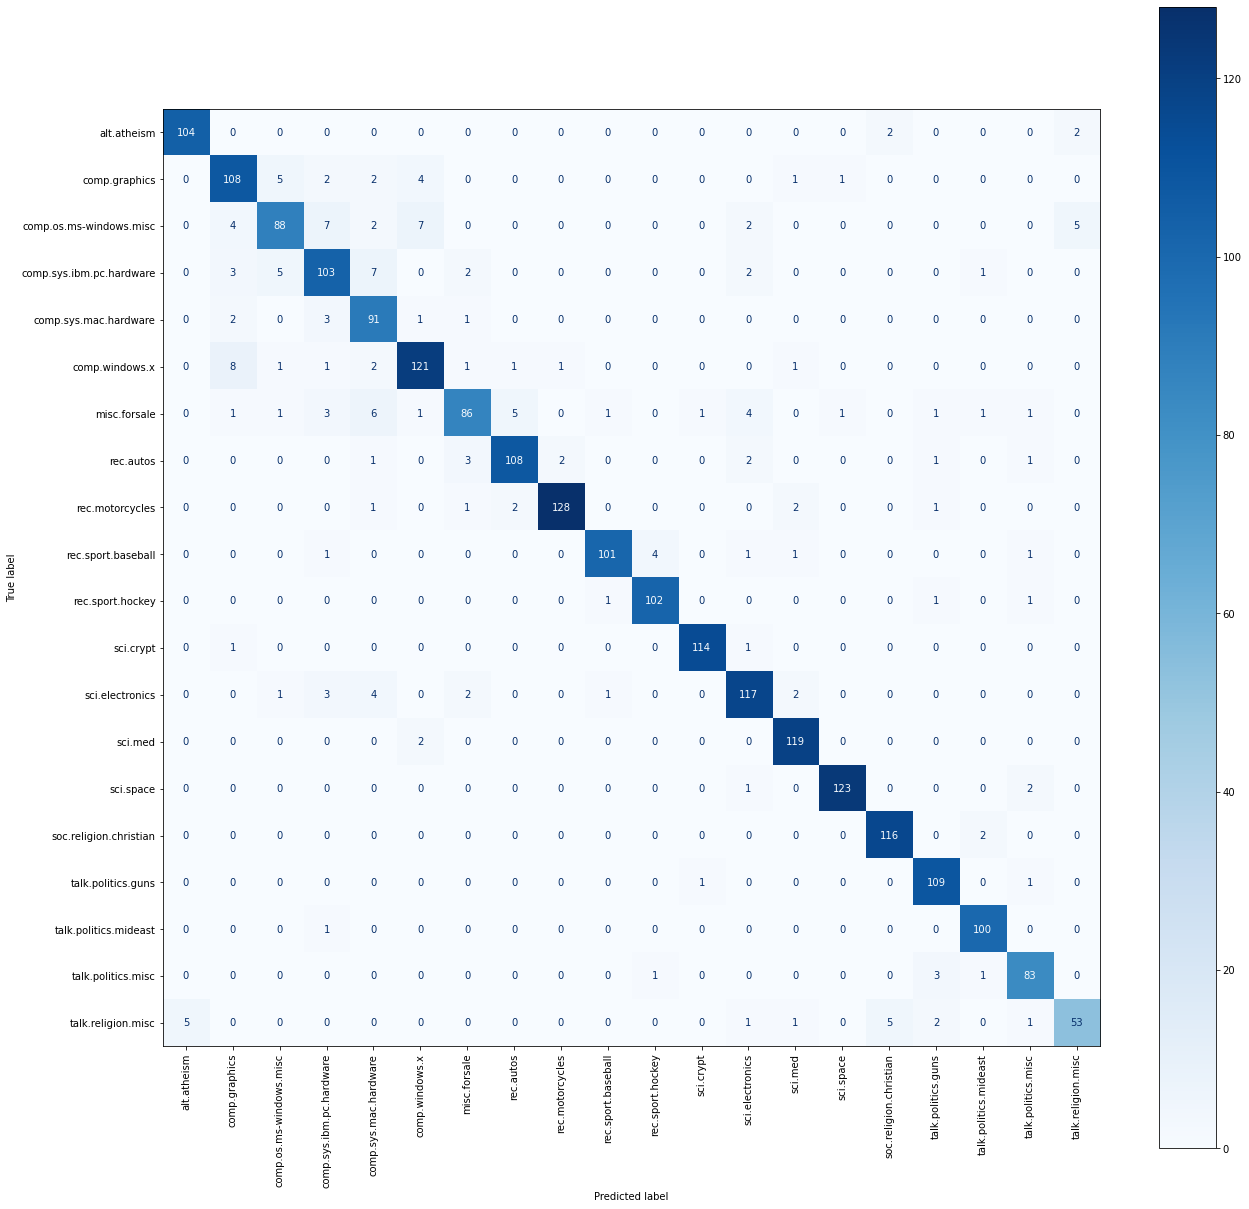

In [27]:
# 3. Plot the confusion matrix of our predictions
fig, ax = plt.subplots(figsize=(21, 21))

disp = plot_confusion_matrix(model, X_test, y_test,
                             display_labels=model.classes_,
                             cmap=plt.cm.Blues, ax=ax)
plt.xticks(rotation=90)
disp


In [ ]:
# 4. Using `classification_report` print the evaluation results for all the classes. 

print(classification_report(y_test, y_pred, target_names=model.classes_))

# Manual predicition
Write a new sentence that you think will be classified as talk.politics.guns. 
1. Apply the text pipeline to your sentence
2. Transform your cleaned text using the `X = vectorizer.transform([your_text])`
    * Note, the `transform` function accepts a list and not a individual string.
3. Use the model to predict your new `X`. 
4. Print the prediction

In [29]:
my_sentence = 'the ammo shortage has caused wide debate on covid price changes'

# 1. Apply the text pipeline to your sentence
my_sentence = text_pipeline(my_sentence)

# 2. Transform your cleaned text using the `X = vectorizer.transform([your_text])`\
X = vectorizer.transform([my_sentence])

# 3. Use the model to predict your new `X`.
pred = model.predict(X)

# 4. Print the prediction
print(pred)

['rec.motorcycles']


___
# PART 2: Twitter Data
This part of the exercise is un-guided on purpose.  

Using the `dem-vs-rep-tweets.csv` build a classifier to determine if a tweet was written by a democrat or republican. 

Can you get an f1-score higher than %82

Because tweets are so small already, try not removing stopwords....

In [30]:
# 1. Load the dem-vs-rep-tweets data into a dataframe.
# 2. Print the shape
df = pd.read_csv('data/dem-vs-rep-tweets.csv')
df.shape



(86460, 3)

In [31]:
df.isnull().sum()

Party     0
Handle    0
Tweet     0
dtype: int64

In [32]:
df.Party.value_counts()

Republican    44392
Democrat      42068
Name: Party, dtype: int64

In [33]:
def convert_pos(pos):
    if pos.startswith('V'):
        return wordnet.VERB
    elif pos.startswith('J'):
        return wordnet.ADJ
    elif pos.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN


def lem_with_pos_tag(a_string):
    # Initalize our Lemmer
    lemmatizer = WordNetLemmatizer()
    
    # Break the sentence down into a list of words
    words = word_tokenize(a_string)
    
    # Get the word and pos_tag for each of the words. 
    tagged_words = nltk.pos_tag(words)
    
    # Make a list to append valid words into
    valid_words = []

    # Loop through all the words
    for word in tagged_words:
        
        # The word is the first element in the tuple
        the_word = word[0]
        
        # The pos_tag is the second element in the tuple
        the_pos_tag = word[1]
        
        # Convert the pos_tag into the format the lemmatizer accepts
        the_pos_tag = convert_pos(the_pos_tag)
        
        # Lemmatize the word with the pos_tag
        lemmed_word = lemmatizer.lemmatize(the_word, the_pos_tag)
        
        # Append stemmed word to our valid_words
        valid_words.append(lemmed_word)
        
    # Join the list of words together into a string
    a_string = ' '.join(valid_words)

    return a_string

In [41]:
df['tweet_prep'] = df['Tweet'].apply(text_pipeline)

print("Before:", df['Tweet'][0])
print("After:", df['tweet_prep'][0])

Before: Today, Senate Dems vote to #SaveTheInternet. Proud to support similar #NetNeutrality legislation here in the House… https://t.co/n3tggDLU1L
After: today senat dem vote savetheinternet proud support similar netneutr legisl hous httpstcon3tggdlu1l


In [43]:
X = df['tweet_prep'].values
y = df['Party'].values

vectorizer = TfidfVectorizer()
vectorizer.fit(X)
X = vectorizer.transform(X)

print(X.shape)

(86460, 121124)


In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101521)

In [45]:
params = {
    'alpha':[0.09, 0.1, 0.11],
}

grid_search_cv = GridSearchCV(
    estimator = MultinomialNB(),
    param_grid = params,
    scoring = 'f1_weighted',
)

# Find optimal params
grid_search_cv.fit(X_train, y_train)
print(grid_search_cv.best_params_)

# Set the model to the optimal one
model = grid_search_cv.best_estimator_

{'alpha': 0.11}


In [46]:
y_pred = model.predict(X_test)

accuracy =  model.score(X_test, y_test)
print("Model Accuracy: %f" % accuracy)

print(classification_report(y_test, y_pred, target_names=model.classes_))

Model Accuracy: 0.809912
              precision    recall  f1-score   support

    Democrat       0.81      0.79      0.80      8313
  Republican       0.81      0.83      0.82      8979

    accuracy                           0.81     17292
   macro avg       0.81      0.81      0.81     17292
weighted avg       0.81      0.81      0.81     17292

